Knock airport Weather

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

Plot:

The temperature  
The mean temperature each day  
The mean temperature for each month  

Part 2:
Plot:

The Windspeed (there is data missing from this column)  
The rolling windspeed (say over 24 hours)  
The max windspeed for each day  
The monthly mean of the daily max windspeeds (yer I am being nasty here)  
You do not need to over comment your code. Marks will be given for how nice the plots are.  

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [2]:
# URL data
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# Saving CSV data into a dataframe skipiing the first 23 rows of the file with unnecessary 
df = pd.read_csv(url, skiprows=23)

# Visualize headers for analysis
headers = df.columns.tolist()
headers


C:\Users\vanel\AppData\Local\Temp\ipykernel_716\3615165674.py:5: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, skiprows=23)


['date',
 'ind',
 'rain',
 'ind.1',
 'temp',
 'ind.2',
 'wetb',
 'dewpt',
 'vappr',
 'rhum',
 'msl',
 'ind.3',
 'wdsp',
 'ind.4',
 'wddir',
 'ww',
 'w',
 'sun',
 'vis',
 'clht',
 'clamt']

https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas #Skiprows

In [3]:
# Checking file content
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6


Temperature Plot

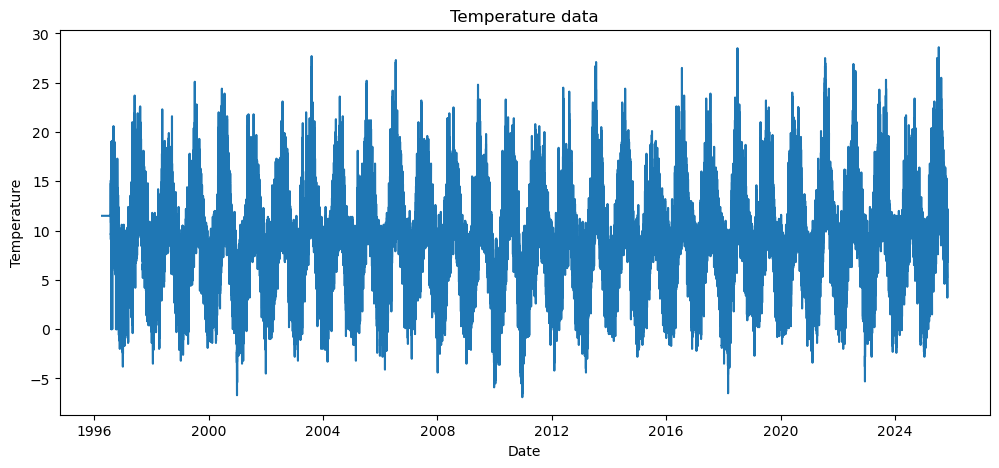

In [4]:
# Converting datetime
df["date"] = pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

# Plot
plt.figure(figsize=(12,5))
sns.lineplot(x="date", y="temp", data=df)
plt.title("Temperature data")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

https://pbpython.com/pandas_dtypes.html #converting datetime  
https://seaborn.pydata.org/tutorial/introduction.html #Seaborn library

Mean temperature each day plot

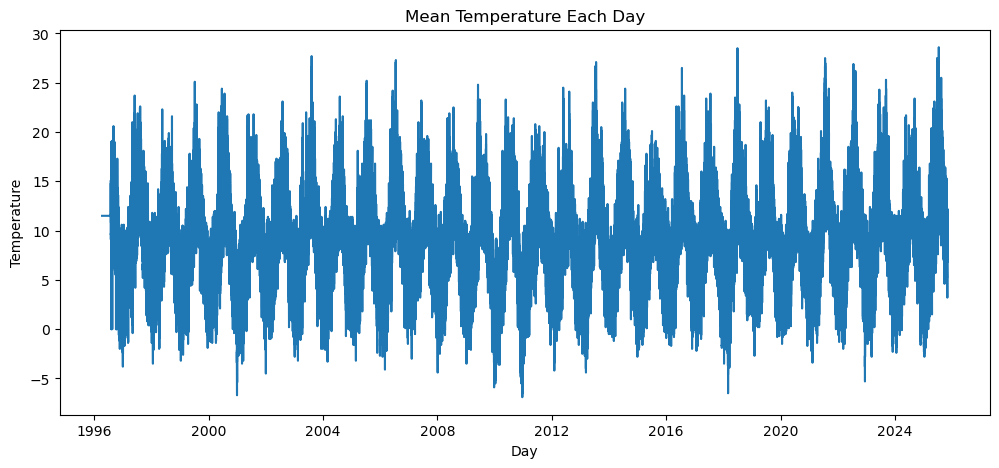

In [5]:
# Plot
plt.figure(figsize=(12,5))
sns.lineplot(data=df.groupby("date")["temp"].mean())
plt.title("Mean Temperature Each Day")
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.show()

https://stackoverflow.com/questions/69836554/group-by-and-mean-inside-seaborn-plot # Plotting mean with Seaborn

Mean temperature each month plot

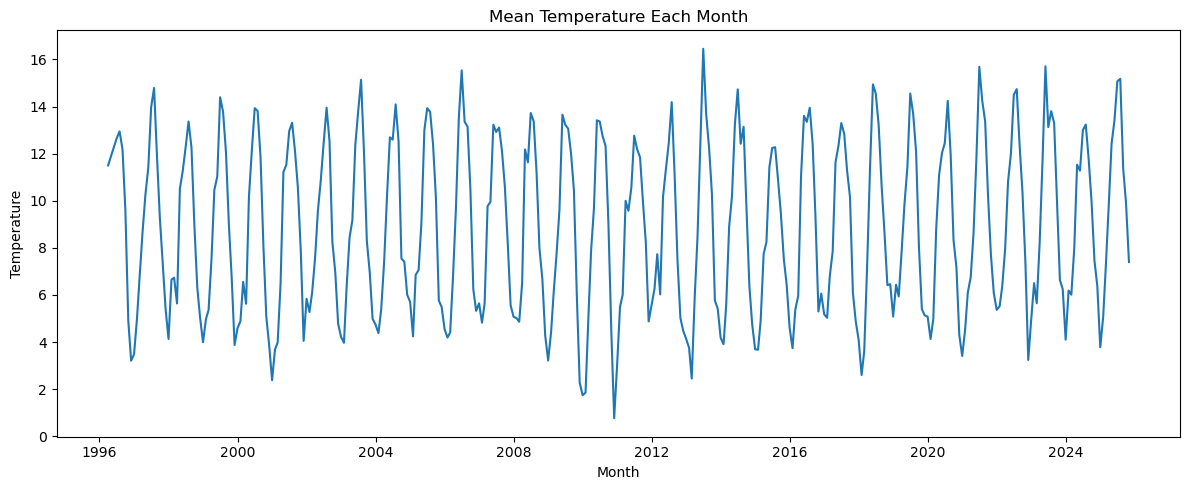

In [6]:
#Calculating mean grouping date data by month
mean_montly = df.groupby(df["date"].dt.to_period("M"))["temp"].mean()

# Converting mean datatype from period to timestamp
mean_montly.index = mean_montly.index.to_timestamp()

# Plot
plt.figure(figsize=(12,5))
plt.plot(mean_montly.index, mean_montly.values)
plt.title("Mean Temperature Each Month")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.tight_layout()
plt.show()




https://medium.com/@gfakhira9/to-period-909ee90ce6c1 #grouping dates by month  
https://www.kaggle.com/code/ravijoe/seaborn-barplot-and-pandas-value-counts #index and .values barplot  
https://stackoverflow.com/questions/43206554/typeerror-float-argument-must-be-a-string-or-a-number-not-period #float() argument must be a string or a real number, not 'Period'  